<a href="https://colab.research.google.com/github/rhapis97/Practice_AI/blob/main/210707_NLP_Encoding%2BDecoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [2]:
ls    # 현재 폴더의 리스트 보여주세요

Mecab-ko-for-Google-Colab/  sample_data/


In [3]:
cd Mecab-ko-for-Google-Colab/    # cd: change directory

/content/Mecab-ko-for-Google-Colab


In [4]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 450kB 33.4MB/s 
     |████████████████████████████████| 92kB 9.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-07 00:32:47--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=E6VUh4UwR7rQMw%2BmXkKM8tmQiXs%3D&Expires=1625619768&AWSAccessKeyId=AKIA6KOSE3BN

In [5]:
!pip install konlpy

In [6]:
from konlpy.tag import Mecab

In [7]:
mecab = Mecab()

In [8]:
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [9]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [10]:
pwd       # 현재 위치

'/content/Mecab-ko-for-Google-Colab'

In [11]:
cd ../    # 상위폴더로 이동

/content


In [12]:
pwd

'/content'

In [13]:
path_to_file = '/content/drive/MyDrive/백_data/korean-english-park.train.ko'

In [16]:
with open(path_to_file, 'r', encoding='utf-8') as f:
  raw = f.read().splitlines()    # 라인별로 split

print('Data Size', len(raw))
print('Example')
for sen in raw[0:100][::20]:    # 인덱스 0, 20, 40, 60, 80에 해당하는 데이터  -  raw[0:100:20]와 같다
  print('>>', sen)

Data Size 94123
Example
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [28]:
print(len(raw[3]))
print(type(raw))
print(type(raw[3]))

90
<class 'list'>
<class 'str'>


In [29]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이:', min_len)
print('문장의 최장 길이:', max_len)
print('문장의 평균 길이:', sum_len//len(raw))

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


Text(0.5, 1.0, 'Sentence Length Distribution')

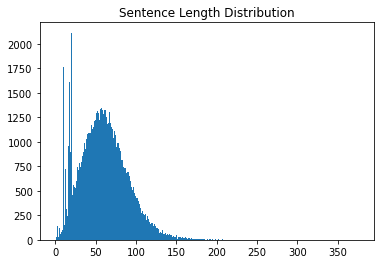

In [31]:
sentence_length = np.zeros((max_len), dtype=np.int)    # 최장 길이로 0 배열 만들기

for sen in raw:
  sentence_length[len(sen)-1] += 1                     # 길이에 따른 문장 개수 세기

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('Sentence Length Distribution')              # 해당 문장 길이(x)인 문장 개수(y)

In [39]:
def check_sentence_with_length(raw, length):
  count = 0
  for sen in raw:
    if len(sen) == length:
      print(sen)
      count += 1
      if count > 100: return

In [41]:
check_sentence_with_length(raw, 3)

코브:
코브:
MMR
버뮤다
▲쇼핑
첫째날
둘째날
교훈:
교훈:
ST.
ST.
ST.
ST.
ST.
ST.
ST.
ST.
ST.
이벤트
프린트
이벤트
통계청
감사원
철도청
단어장


In [38]:
for idx, _sum in enumerate(sentence_length):
  if _sum > 1500:
    print('Outlier index:', idx+1)

Outlier index: 11
Outlier index: 19
Outlier index: 21


In [42]:
# 문장길이가 11
check_sentence_with_length(raw, 11)    # 중복 문장이 많다.

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [45]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))                # set을 통해 문장 중복 없애기
print('Data Size:', len(cleaned_corpus))

for sen in cleaned_corpus:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print('문장의 최단 길이:', min_len)
print('문장의 최장 길이:', max_len)
print('문장의 평균 길이:', sum_len//len(cleaned_corpus))

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


In [46]:
check_sentence_with_length(cleaned_corpus, 11)    # 문장 중복이 사라진 것을 확인할 수 있다.

작은 못이 아닙니다.
케냐 야생동물 고아원
그는 "잘 모르겠다.
이 일은 계속됩니다.
원문기사 원문기사보기
대답은 다음과 같다.
본서, 본부, 사령부
는 돌발질문을 했다.
비관적인, 염세주의의
좀 더 말씀해주시죠.
raft 다수, 다량
대통령 후보자의 지명
resign 사퇴하다
제발 답변을 주세요!
미래 동맹 정책 구상
brisk 활기를 띤
끌어내다, 철수시키다
전유를 넣은 카페라떼
스피어스가 뚱뚱한가?
경유 1200원대로…
나는 크게 실망했다.
하와이, 빅 아일랜드
큰 파티는 아니지요.
(아직 읽고있습니까?
이전 보기 다음 보기
그녀의 아름다운 눈.
지하철 타기 겁난다.
우리는 운이 좋았다.
디즈니사만이 아니다.
Congress 의회
시대가 변하고 있다.
남한의 객관적 평가?
원화 강세 언제까지?
산 위를 나는 느낌.
"사과할 것이 없다.
로그인 Korea사전
더 내려야 하는 이유
외교통상부 이슬람교도
levee 제방, 둑
meantime 한편
를 외치며 기뻐했다.
- 모르고 있습니다.
세 시간쯤 걸었을까?
이력서와 자기 소개서
9. 몇 분간의 명상
건물 전체 무너져내려
라고 조던이 말했다.
정권을 잡다[장악하다
고 소식통이 전했다.
미래의 최첨단 사무실
사업의) 합병, 합동
천재 소녀의 '부활'
처음에는 장난이었다.
(정당의) 원내 총무
hearing 청문회
tribunal 법정
- 네, 보이는군요.
그 이유는 간단하다.
키스를 잘 하는 방법
아기가 숨을 멈출 때
조금은 새침한 샬롯？
그들은 신중했습니다.
standard 표준
크라이슬러. 조업중단
pledge 서약하다
폭탄테러가 공포 유발
의자는 비어 있었다.


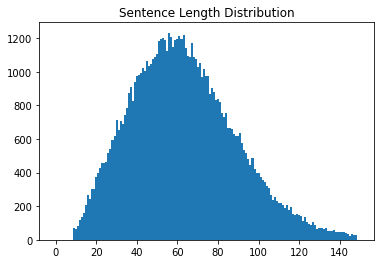

In [47]:
max_len = 150
min_len = 10

# 10 ~ 150 사이의 문장분포
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('Sentence Length Distribution')
plt.show()

In [48]:
# 삐쭉삐쭉한 부분을 다 정제하고 범위도 정해주었더니 이전보다 안정된 그래프를 그린다.

## 공백 기반 토큰화

In [62]:
def tokenize(corpus):
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')                       # 토크나이징
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)                                       # 벡터화(숫자화)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')      # 뒤쪽으로 패딩 (앞쪽: padding='pre')
  return tensor, tokenizer

In [66]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해보세요~
split_corpus = []

for kor in filtered_corpus:
  # 코드를 작성하세요.
  split_corpus.append(kor.split())

print(split_corpus[0])    # 공백을 기준으로 문장을 잘 잘라주고 있다.

['중국과', '일본은', '가스전', '문제말고도', '일본의', '식민지배와', '과거', '역사에', '대한', '태도에', '대해', '수도', '없이', '갈등을', '빚어오고', '있다.']


In [67]:
split_tensor, split_tokenizer = tokenize(split_corpus)

In [68]:
print('Split Vocab Size:', len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [69]:
split_tensor, split_tokenizer = tokenize(filtered_corpus)
print('Split Vocab Size:', len(split_tokenizer.index_word))

Split Vocab Size: 238086


In [70]:
for idx, word in enumerate(split_tokenizer.word_index):
  print(idx, ':', word)

  if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [71]:
# 밝혔다 → 밝 + 혔다 / 원형이 밝히다 or 밝다 로 다양하게 해석될 수 있다.(중의성)
# 따라서 의미로 토큰화하는 mecab의 형태소 분석 이용해보자

## 형태소 토큰화

In [73]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어 보세요.
# Hint: mecab.morphs()를 사용해서 형태소 분석을 합니다.

def mecab_split(sentence):
  ## 코드를 작성하세요
  return mecab.morphs(sentence)

mecab_corpus = []
for kor in filtered_corpus:
  ## 코드를 작성하세요
  mecab_corpus.append(mecab_split(kor))

In [77]:
print(mecab_corpus[0])    # 형태소 단위로 분리하고 있다.

['중국', '과', '일본', '은', '가스전', '문제', '말', '고', '도', '일본', '의', '식민지', '배', '와', '과거', '역사', '에', '대한', '태도', '에', '대해', '수도', '없이', '갈등', '을', '빚', '어', '오', '고', '있', '다', '.']


In [74]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print('MeCab Vocab Size:', len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


In [100]:
print(mecab_tokenizer.index_word)    # 형태소와 인덱스가 딕셔너리 형태로 짝지어져 있다

{1: '.', 2: '다', 3: '이', 4: '는', 5: '을', 6: '의', 7: '에', 8: '은', 9: '를', 10: '하', 11: '했', 12: '고', 13: '있', 14: '들', 15: '가', 16: '에서', 17: ',', 18: '한', 19: '것', 20: '으로', 21: '로', 22: '“', 23: '다고', 24: '”', 25: '과', 26: '인', 27: ')', 28: '(', 29: '일', 30: '그', 31: '지', 32: '명', 33: '와', 34: '말', 35: '적', 36: '기', 37: '할', 38: '었', 39: '라고', 40: '도', 41: '되', 42: '년', 43: '며', 44: '수', 45: '밝혔', 46: '않', 47: '미국', 48: '된', 49: '게', 50: '"', 51: '만', 52: '대통령', 53: '해', 54: '2', 55: '시간', 56: '던', 57: '에게', 58: '어', 59: '1', 60: '전', 61: '됐', 62: '았', 63: '받', 64: '정부', 65: '중', 66: '월', 67: '대한', 68: '\xa0', 69: '위해', 70: '현지', 71: '이번', 72: '전했', 73: '3', 74: '습니다', 75: '없', 76: '지난', 77: '주', 78: '지만', 79: '이라크', 80: '까지', 81: '한다', 82: '대해', 83: '‘', 84: '사람', 85: '될', 86: '’', 87: '경찰', 88: '지역', 89: '북한', 90: '미', 91: '면', 92: '자', 93: '중국', 94: '4', 95: '다는', 96: '5', 97: '그러나', 98: '자신', 99: '아', 100: '-', 101: '6', 102: '주장', 103: '발생', 104: '으며', 105: '%', 106: '같', 107: "'

In [82]:
# 위의 이러한 과정을 인코딩이라고 부른다.
# 이제 다시 복구하는 디코딩

## Decoding(Detokenizer)

1. tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
2. tokenizer.index_word를 사용하여 Decoding  
  
두 가지 방법을 사용하여 mecab_tensor[100]을 원문으로 되돌려 봅시다.  
(여기서는 띄어쓰기는 고려하지 않습니다!)

In [124]:
# Case 1: tokenizer.sequences_to_texts()
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])[0]
print(texts)

ev - 71 감염 이 심하 지 않 을 경우 , 감기 증상 , 설사 증상 과 손 , 발 , 입 에 발진 증상 이 나타난다 .


In [125]:
# Case 2: tokenizer.index_word()
sentence = ''
for w in mecab_tensor[100]:
  if w == 0: continue
  sentence += mecab_tokenizer.index_word[w] + ' '
print(sentence)

ev - 71 감염 이 심하 지 않 을 경우 , 감기 증상 , 설사 증상 과 손 , 발 , 입 에 발진 증상 이 나타난다 . 
